In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from platform import python_version

print(python_version())

3.7.12


In [ ]:
!nvidia-smi



Sun Feb  6 15:30:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    28W /  70W |    264MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 98 kB 8.1 MB/s 


In [ ]:
cd /content/drive/MyDrive/project


/content/drive/MyDrive/project


In [ ]:
!pip install numpy --upgrade

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
pwd

'/content/drive/MyDrive/project'

In [ ]:
%cd /content/drive/MyDrive/project
!unzip /content/drive/MyDrive/project/dataset.zip



Streaming output truncated to the last 5000 lines.
  inflating: plant dataset/train/Tomato___Target_Spot/3a2dbdb1-188c-4499-acff-1bcc3b377320___Com.G_TgS_FL 8206_newPixel25.JPG  
  inflating: plant dataset/train/Tomato___Target_Spot/3a53fede-6ec6-4e6c-a19f-ad1324604ca8___Com.G_TgS_FL 8086_180deg.JPG  
  inflating: plant dataset/train/Tomato___Target_Spot/3a53fede-6ec6-4e6c-a19f-ad1324604ca8___Com.G_TgS_FL 8086_flipTB.JPG  
  inflating: plant dataset/train/Tomato___Target_Spot/3a53fede-6ec6-4e6c-a19f-ad1324604ca8___Com.G_TgS_FL 8086_new30degFlipLR.JPG  
  inflating: plant dataset/train/Tomato___Target_Spot/3a72a7cf-4406-4bad-9bf2-582ce0daaf86___Com.G_TgS_FL 8336.JPG  
  inflating: plant dataset/train/Tomato___Target_Spot/3a72a7cf-4406-4bad-9bf2-582ce0daaf86___Com.G_TgS_FL 8336_180deg.JPG  
  inflating: plant dataset/train/Tomato___Target_Spot/3a72a7cf-4406-4bad-9bf2-582ce0daaf86___Com.G_TgS_FL 8336_flipTB.JPG  
  inflating: plant dataset/train/Tomato___Target_Spot/3a72a7cf-4406-4bad-9bf

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r"C:\Users\venka\OneDrive\Desktop\Data science\project\plant dataset\train"
valid_path = r"C:\Users\venka\OneDrive\Desktop\Data science\project\plant dataset\test"


In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


AttributeError: 'list' object has no attribute 'class_names'

In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [4]:
  # useful for getting number of output classes
#folders = glob('/content/drive/MyDrive/project/plant dataset/train/*')
folders = glob(r"C:\Users\venka\OneDrive\Desktop\Data science\project\plant dataset\train\*")

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"C:\Users\venka\OneDrive\Desktop\Data science\project\plant dataset\train",
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [8]:
class_names = training_set.class_names
print(class_names)

AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project/plant dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
result=model.fit_generator(training_set,validation_data=test_set,epochs=40,steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/40
184/184 [==============================] - 215s 1s/step - loss: 0.3594 - accuracy: 0.8786 - val_loss: 10.8439 - val_accuracy: 0.6190
Epoch 2/40
184/184 [==============================] - 179s 973ms/step - loss: 0.3167 - accuracy: 0.8936 - val_loss: 10.7998 - val_accuracy: 0.6294
Epoch 3/40
184/184 [==============================] - 180s 976ms/step - loss: 0.2639 - accuracy: 0.9116 - val_loss: 10.9783 - val_accuracy: 0.6185
Epoch 4/40
184/184 [==============================] - 180s 980ms/step - loss: 0.2389 - accuracy: 0.9179 - val_loss: 10.9104 - val_accuracy: 0.6190
Epoch 5/40
184/184 [==============================] - 180s 977ms/step - loss: 0.2182 - accuracy: 0.9271 - val_loss: 10.9349 - val_accuracy: 0.6205
Epoch 6/40
184/184 [==============================] - 180s 979ms/step - loss: 0.2135 - accuracy: 0.9287 - val_loss: 10.9065 - val_accuracy: 0.6273
Epoch 7/40
184/184 [==============================] - 180s 979ms/step - loss: 0.1939 - accuracy: 0.9350 - val_loss: 10.98

In [ ]:
import matplotlib.pyplot as plt

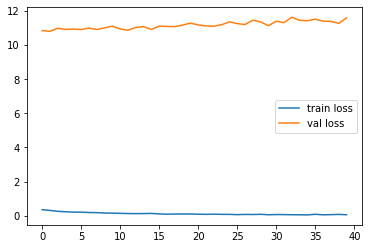

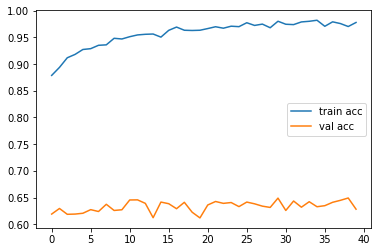

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:

y_pred = model.predict(test_set)
